In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [145]:
df = pd.read_csv("/home/TE/Downloads/StudentsPerformance_modified.csv")
orgnl = pd.read_csv("/home/TE/Downloads/StudentsPerformance_modified.csv")

In [8]:
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
#     inconsistencies, use any of the suitable techniques to deal with them.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal
#     with them.
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be 
#     one of the following reasons: to change the scale for better understanding of the variable, to convert a 
#     non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a 
#     normal distribution.

In [146]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [147]:
print("NULL:\n",df.isnull().sum())
print("NA: \n", df.isna().sum())

NULL:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  1
writing score                  2
dtype: int64
NA: 
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  1
writing score                  2
dtype: int64


In [149]:
df.fillna(df.mean(), inplace = True)

/tmp/ipykernel_4423/2622515659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [150]:
print("NULL:\n",df.isnull().sum())
print("NA: \n", df.isna().sum())

NULL:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64
NA: 
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64


In [151]:
df["math score"].isnull().sum()

8

In [152]:
df["math score"].dtypes

dtype('O')

In [153]:
df["math score"] = pd.to_numeric(df["math score"], errors='coerce').fillna(0).astype(np.int64)

In [154]:
df['math score'].isnull().sum()

0

In [156]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [157]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [158]:
mapping = {
    "associate's degree":5,
    "master's degree": 4,
    "bachelor's degree":3, 
    'some college':2,  
    'high school':1, 
    'some high school':0
}

In [159]:
df["parental level of education"] = df["parental level of education"].map(mapping)
df["parental level of education"]

0      3
1      2
2      4
3      5
4      2
      ..
434    0
435    2
436    5
437    5
438    5
Name: parental level of education, Length: 439, dtype: int64

In [160]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['race/ethnicity']= label_encoder.fit_transform(df['race/ethnicity'])
df['lunch']= label_encoder.fit_transform(df['lunch'])
df["test preparation course"]= label_encoder.fit_transform(df["test preparation course"])

In [161]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,3,1,1,72,72.0,74.0
1,0,2,2,1,0,69,90.0,88.0
2,0,1,4,1,1,90,95.0,93.0
3,1,0,5,0,1,47,57.0,44.0
4,1,2,2,1,1,76,78.0,75.0


In [162]:
df['total score'] = df['writing score'] + df['math score'] + df['reading score']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1e2efe9e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1e2eff8310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1e2efe9b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1e2eff88b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1e2eff8b80>],
 'means': []}

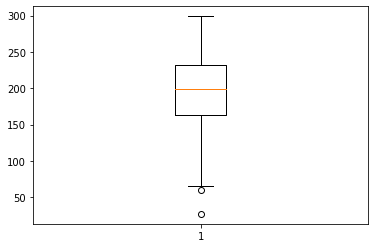

In [163]:
plt.boxplot(df["total score"], notch=None, vert=None, patch_artist=None, widths=None)

<AxesSubplot:xlabel='total score', ylabel='Count'>

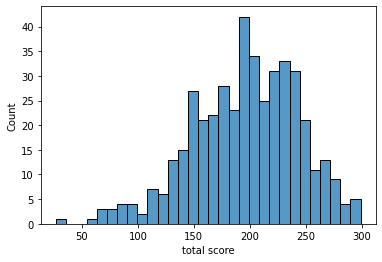

In [164]:
sns.histplot(df['total score'], bins=30)

In [165]:
arr1 = df["total score"]
q1 = np.quantile(arr1, 0.25)
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr)
print(lower_bound, upper_bound)

68.5
60.75 334.75


In [166]:
lowScorers = df.loc[df['total score'] <= 60.75]

In [210]:
df = df.loc[lower_bound <= df['total score']]

In [211]:
lowScorers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
17,0,1,0,0,1,0,32.0,28.0,60.0
59,0,2,0,0,1,0,17.0,10.0,27.0


In [168]:
orgnl.iloc[17]

gender                                   female
race/ethnicity                          group B
parental level of education    some high school
lunch                              free/reduced
test preparation course                    none
math score                                  NaN
reading score                              32.0
writing score                              28.0
Name: 17, dtype: object

In [169]:
orgnl.iloc[59]

gender                                   female
race/ethnicity                          group C
parental level of education    some high school
lunch                              free/reduced
test preparation course                    none
math score                                    0
reading score                              17.0
writing score                              10.0
Name: 59, dtype: object

In [180]:
df.drop(59)
df.drop(17)

gender                          0.0
race/ethnicity                  2.0
parental level of education     0.0
lunch                           0.0
test preparation course         1.0
math score                      0.0
reading score                  17.0
writing score                  10.0
total score                    27.0
Name: 59, dtype: float64

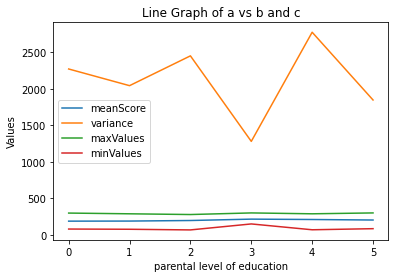

In [212]:
# plotting total score variance and mean scores against education of parents
meanScore = []
variance = []
maxValues = []
minValues = []

levelEdu = [0, 1, 2, 3, 4, 5]
for i in levelEdu:
  sub_df = df[df['parental level of education'] == i]
  meanScore.append(sub_df['total score'].mean())
  variance.append(sub_df['total score'].var())
  maxValues.append(sub_df['total score'].max())
  minValues.append(sub_df['total score'].min())

plt.plot(levelEdu, meanScore, label='meanScore')
plt.plot(levelEdu, variance, label='variance')
plt.plot(levelEdu, maxValues, label='maxValues')
plt.plot(levelEdu, minValues, label='minValues')

# Adding labels and legend
plt.xlabel('parental level of education')
plt.ylabel('Values')
plt.title('Line Graph of a vs b and c')
plt.legend()

# Show the plot
plt.show()

<AxesSubplot:xlabel='parental level of education', ylabel='total score'>

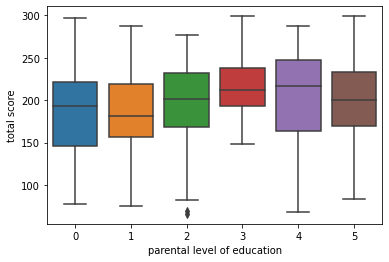

In [213]:
sns.boxplot(data=df, x='parental level of education', y ='total score')

In [214]:
temp = df['race/ethnicity'].value_counts()

racef = []
racel = []

for i in range(len(temp)):
    racef.append(temp[i])
    racel.append(i)

racef

[35, 87, 142, 114, 59]

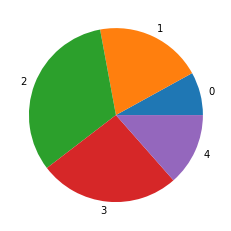

In [215]:
plt.pie(racef, labels = racel)
plt.show() 

In [216]:
temp = df['parental level of education'].value_counts()

racef = []
racel = []

for i in range(len(temp)):
    racef.append(temp[i])
    racel.append(i)

racef

[82, 75, 100, 50, 26, 104]

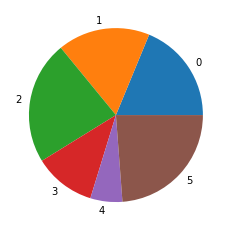

In [217]:
plt.pie(racef, labels = racel)
plt.show() 

In [218]:
temp = df['test preparation course'].value_counts()

racef = []
racel = []

for i in range(len(temp)):
    racef.append(temp[i])
    racel.append(i)

racef

[152, 285]

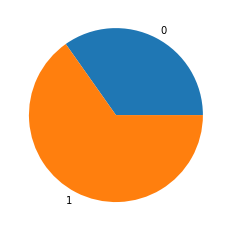

In [219]:
plt.pie(racef, labels = racel)
plt.show() 

In [220]:
print(df_norm.min(), df_norm.max(), df_norm.mean())

0.0 1.0 0.560604917415218


In [221]:
# sns.histplot(df_norm, bins=30)
df_norm = df['total score']

In [222]:
arr1 = df_norm
q1 = np.quantile(arr1, 0.25)
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr)
print(lower_bound, upper_bound)

df_norm = df_norm.loc[lower_bound <= df_norm]

68.0
62.0 334.0


In [223]:
# min max normalization
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
df_norm

0      0.652361
1      0.776824
2      0.909871
3      0.351931
4      0.699571
         ...   
434    0.283262
435    0.150215
436    0.283262
437    0.313305
438    0.313305
Name: total score, Length: 437, dtype: float64

<AxesSubplot:xlabel='total score', ylabel='Count'>

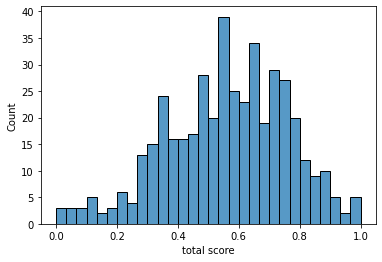

In [224]:
sns.histplot(df_norm, bins=30)